# Q-Learning pt.2 : State Spaces & Deep Q Networks

# Q-learning 
In de vorige opdracht hebben we gekken naar simpele taken waarbij de state space bekend was en de mogelijke acties ook. Maar vaak zijn de omgevingen een stuk ingewikkelder. In deze opdracht gaan we een paar stapjes verder. We beginnen bij kleine omgevingen die verkend moeten worden, maar nog wel in Q-tables te vangen zijn. Daarna maken we een klein begin met deep Q-networks. Dit is de huidige state-of-the-art in Reinforcement Learning. Aan het eind van deze opdracht moet je een goed idee hebben hoe deze Deep Q Nets werken. 

## Winter is coming:

![](lake.png) 
Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. However, because you don't want to get wet you send out your robot to retrieve the frisbee. The surface is described using a grid like the following:
    
        State:        State #:
        S F F F     0  1  2  3
        F H F H     4  5  6  7 
        F F F H     8  9  10 11 
        H F F G     12 13 14 15 
        
        
    S : starting point, safe
    F : frozen surface, safe
    H : hole, fall to your doom (instant death)
    G : goal, where the frisbee is located
    
The episode ends when you reach the goal or fall in a hole.
    
You receive a reward of 1 if you reach the goal, and zero otherwise.



In [1]:
# The Frozenlake is a standard practive environment from the Open AI Gym. 
# Gym is a toolkit for developing and comparing reinforcement learning algorithms. 
# It supports teaching agents everything from walking to playing games like Pong or Pinball.
# If you do not have this installed yet (shame, shame): https://gym.openai.com/docs/#installation 

import gym
import math
import numpy as np
import random
random.seed(0)

%matplotlib inline
import matplotlib.pyplot as plt


### Loading the environment

In [2]:
# Let's load the Frozen lake environment
# Slippery means that sometimes the robot will slip on the ice and move in a random direction 
env_4x4 = gym.make('FrozenLake-v0',map_name="4x4",is_slippery=False)

### Check the environment

In [3]:
# This function shows your current location and the environment
env_4x4.render()


SFFF
FHFH
FFFH
HFFG


### Implement Q-Table learning algorithm

Ontwikkel nu een Q learning algoritme dat kan leren hoe het beste van start $S$ naar het doel $G$ te lopen, en dus de wakken de vermijden.

Details over Q-learning zijn terug te vinden in de college slides en het hoofdstuk van Gureckis & Love [**computational reinforcement learning**](http://bradlove.org/papers/GureckisLovePress.pdf) en voor meer verdieping in het online boek van [**Sutton & Barto**](http://incompleteideas.net/book/bookdraft2018jan1.pdf) en dan met name hoofdstuk 6.


**Let op:** In dit experiment zijn meerdere states. Dit heeft als gevolg dat bij het leren rekening gehouden moet worden met de actie die in de volgende state gemaakt wordt. We gaan er hier daarom vanuit dat de robot altijd de actie kiest met de hoogste Q-value. De prediction error wordt dus:

$$\delta = r_{t+1} + \gamma\ max_a\ Q(s_{t+1} , a) − Q(s_t , a_t)$$

Waarbij de Q-value update nog steeds is gedefinieerd als:

$$Q(s_t, a_t) = Q(s_t, a_t) + \alpha \delta$$

In het begin van het experiment heeft de robot geen enkele kennis van de wereld en geen enkele verwachtingen over het krijgen van beloningen. Voor elke actie op elk vlak van het grid geldt dus:

$Q(s, LEFT)=Q(s, RIGHT)=Q(s, UP)=Q(s, DOWN)=0$


# 1.a (10 punten)

Schrijf een functie `q_learn` die als input env (*Open AI Gym* environment), alpha ($\alpha$), epsilon ($\epsilon$), gamma ($\gamma$) en episodes accepteert. 

De output van deze functie moet een table zijn met $Q$ waarden voor elke state en elke actie. Er zijn 16 states en 4 acties dus in totaal 64 combinaties. Voor de diagnose van het algoritme is het belangrijk een lijst met de totaal verdiende beloningen en ook een lijst met de hoeveelheid stappen tot het doel (per episode) als output te hebben. 

We gaan er nu van uit dat de robot de $\epsilon$-greedy keuze regel toepast, waarbij $\epsilon$ afneemt met de tijd. 

Hier alvast wat code om je op weg te helpen:

```python


def q_learn(env, alpha=.8, gamma=.95, epsilon=.1, num_episodes=2000):

    # Initialize Q table with all zeros
    states = env.observation_space.n
    actions = env.action_space.n
    Q = np.zeros([states,actions])

    # Create lists to contain total rewards and steps per episode
    jList = [] #step list
    rList = [] #reward list

    # Start learning:
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        # Total rewards this episode start at 0
        rAll = 0
        # You are still not done: (d is specific to frozen lake) 
        d = False
        # Run counter reset:
        j = 0
    
        # The Q-Table learning algorithm, each episode consists of several learning runs (loops)
        while j < 100:
            j+=1
        
            # Choose an action by greedily picking from Q table
            # NOTE (a)ctions in FrozenLake are 0:left,1:down,2:right,3:up  (this is hardcoded in env.)
            
            # implement the e-greedy rule
            # As in previous laptop colleges arbitrate between draws when there is more than one max Q
                
            a = # TODO
            
                 
            # Get new state and reward from environment, this can/must be done with env.step from the Gym
            # where s1 is the new state, r is the reward, and d means the end (hole or frisbee)
            s1,r,d,_ = env.step(a)
            
            # Update Q-Table with new knowledge (assume you pick a with highest value in that state)
            Q[s,a] = # TODO
            
            
            # Update total rewards
            rAll += r
            
            # If frisbee or hole (d) then end run
            # TODO
            
            
            # Update state
            s = s1
        
   
        # Update e, reducing exploration over episodes
        epsilon = epsilon*.999
        jList.append(j)
        rList.append(rAll)
    
    return (rList, jList, Q)  
```

De ingevoerde hyperparameters werken goed maar voel je vrij om hier mee te experimenteren. 


In [4]:
def q_learn(env, alpha=.8, gamma=.95, epsilon=.1, num_episodes=2000):

    # Initialize Q table with all zeros
    states = env.observation_space.n
    actions = env.action_space.n
    Q = np.zeros([states,actions])

    # Create lists to contain total rewards and steps per episode
    jList = [] #step list
    rList = [] #reward list

    # Start learning:
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        # Total rewards this episode start at 0
        rAll = 0
        # You are still not done: (d is specific to frozen lake) 
        d = False
        # Run counter reset:
        j = 0
    
        # The Q-Table learning algorithm, each episode consists of several learning runs (loops)
        while j < 100:
            j+=1
        
            # Choose an action by greedily picking from Q table
            # NOTE (a)ctions in FrozenLake are 0:left,1:down,2:right,3:up  (this is hardcoded in env.)
            
            # implement the e-greedy rule
            # As in previous laptop colleges arbitrate between draws when there is more than one max Q
            if random.random() < epsilon:
                a = random.randint(0, actions-1)
            else:
                As = np.argwhere(Q[s,:] == np.amax(Q[s,:])).flatten()
                if len(As) > 1:
                    a = np.random.choice(As)
                else:
                    a = As[0]
                 
            # Get new state and reward from environment, this can/must be done with env.step from the Gym
            # where s1 is the new state, r is the reward, and d means the end (hole or frisbee)
            s1,r,d,_ = env.step(a)
            
            # Update Q-Table with new knowledge (assume you pick a with highest value in that state)
            delta = r + gamma * max(Q[s1,:]) - Q[s,a]
            Q[s,a] += alpha * delta
            
            
            # Update total rewards
            rAll += r
            
            # If frisbee or hole (d) then end run
            if d:
                break
            
            
            # Update state
            s = s1
        
   
        # Update e, reducing exploration over episodes
        epsilon = epsilon*.999
        jList.append(j)
        rList.append(rAll)
    
    return (rList, jList, Q) 

0.719


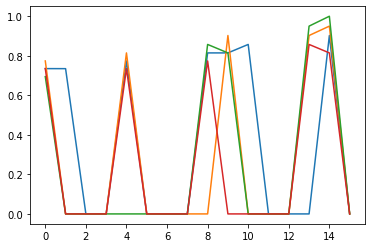

In [5]:
width = 10
env = env_4x4
s = env.reset()
R, J, Q = q_learn(env, num_episodes=1000)
plt.plot(Q)
print(np.average(R))

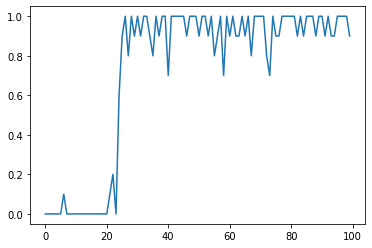

In [6]:
R = np.array(R)
resultR = R[:(R.size // width * width)].reshape(-1, width).mean(axis=1)
plt.plot(resultR, label=r"$1$")

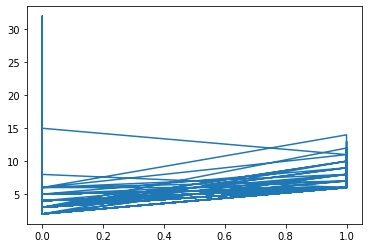

In [7]:
plt.plot(R, J)


# 1.b   (10 punten)     
Laat me behulp van deze functie de robot 1000 episodes leren over deze wereld (1 leer episode bestaat dus uit max 100 trials). Bereken de gemiddelde score over alle episodes (heel soms komt dit model niet op de oplossing run het dan nog eens). 

Plot ook in bins van 10 trials (dus gemiddelde beloning per bin van 10 trials), de verandering in beloningen over tijd. Waar ligt het omslag punt? 

Plot ook in bins van 10 trails, de hoeveelheid stappen die er gemaakt zijn. Hoe kort is de korste route tot succes waar het model op uitkomt? Hoe verhoudt zich dit tot de werkelijke kortste route?

> De gemiddelde reward is ongeveer 0.85.<br>
Het omslagpunt is te zien in de grafiek tussen de 5e en 25e bin (1 bin = 10 trials). Hierna wordt de beloning veel vaker gekregen. <br>
De kortste route tot succes is 6 stappen (met de laatste stap naar de reward meegeteld), dit is ook de werkelijk kortste route.

# Q tables
# 1.c (5 punten)

Laten we nu naar de $Q$ tables gaan kijken. We kunnen zo inspecteren welk route de robot zou lopen als deze altijd max$Q$ zou kiezen (dus puur greedy, $epsilon$=0).

Gebruik nu de final $Q$ table die `learn_q()` aan het eind geeft. Hierbij is elke kolom de lijst van Q values voor 1 actie in alle 16 states. Dus `output[2][:,0]` geeft je de meest linker kolom en dat zijn de Q values voor actie naar links bewegen. 

Zorg dat je een lijst krijgt (Qmax) met voor elke state de actie die de hoogste Q value had. Representeer hier elke actie met een getal (0=links, 1=beneden, 2=rechts, 3=boven). Plot vervolgens deze lijst in een grid: 

```python
env_4x4.render()
print()

Qmax=np.asarray(Qmax).reshape((4,4))
print(Qmax)

plt.matshow(Qmax)
plt.show()
```

Hiervoor gebruiken we [matshow](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.matshow.html), om te zorgen dat de verschillende waarde in de matrix getoond worden met verschillende kleuren. Donkere kleuren zijn hierbij lage waardes en lichte kleuren hogere waardes.

Ga nu na hoe de robot loopt, gaat deze links of rechts langs het wak linksboven op de kaart. 

  (Right)
SFFF
FHFH
FFFH
HFFG

[[1 0 0 0]
 [1 0 0 0]
 [2 1 0 0]
 [0 2 2 0]]


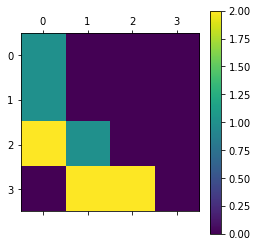

 0=left
 1=down
 2=right
 3=up
De robot gaat in deze versie links langs het wak linksboven op de kaart


In [8]:
Q_max = []
state_Q = []
count = 0
for state in Q:
    best = np.argmax(state)
    state_Q.append(best)
    count += 1
    if count == 4:
        Q_max.append(state_Q)
        count = 0
        state_Q = []
        
Q_max = np.array(Q_max)
# print(Q_max)

env.render()
print()

Qmax=np.asarray(Q_max).reshape((4,4))
print(Qmax)

plt.matshow(Qmax)
plt.colorbar()
plt.show()

print(" 0=left\n 1=down\n 2=right\n 3=up")
print("De robot gaat in deze versie links langs het wak linksboven op de kaart")

# 2 Loading the slippery environment
We bekijken nu even snel de situatie waarin de robot zich op glad ijs begeeft. Dit houdt in dat de robot af en toe gewoon een andere kant opschuift. Laadt de omgeving opnieuw in, maar nu met `is_slippery=True`. Deze omgeving is als trainings omgeving bedacht omdat er vaak ruis (noise) zit in de omgeving (of in perceptie zelf) en dus soms dingen net anders lopen dan verwacht. Een goed robust algortime kan hier dan ook mee leren omgaan. 

Het testen van een algoritme in een simulatie van een perfecte wereld, zoals hierboven, kan tot catastrofale uitkomsten leiden wanneer deze wordt losgelaten in de echte wereld (waarbij de weg ineens glad kan zijn of er een sterke storm opsteekt, er is altijd wel iets onvoorzien). 

In [9]:
#let's load the Frozen lake environment
#slippery means that sometimes the robot will slip on the ice and move in a random direction 
env_slip = gym.make('FrozenLake-v0',map_name="4x4",is_slippery=True)

## 2.a (5 punten)
Run hetzelfde `q_learn` algoritme, met dezelfde parameter waardes. Laat nu ook weer de gemiddelde score zien, en ook hoe de gemiddelde beloning en het aantal stappen met de tijd verandert. Vergelijk dit met de non-slippery omgeving van hiervoor, noem de meest opvallende verschillen en leg uit waarom we die zien. 

0.154
154
846


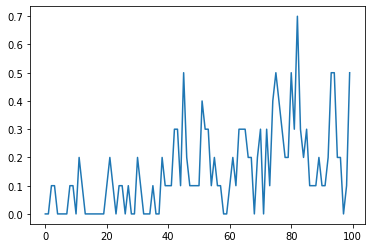

In [10]:
env = env_slip
s = env.reset()
R, J, Q = q_learn(env, num_episodes=1000)

print(np.average(R))
R = np.array(R)
resultR = R[:(R.size // width * width)].reshape(-1, width).mean(axis=1)
plt.plot(resultR, label=r"$1$")
N = list(R).count(1)
M = list(R).count(0)
print(N)
print(M)

De gemiddelde score is nu rond de 0.15, dus veel lager dan de non-slippery omgeving. Dit komt (natuurlijk) door
het feit dat er nu soms random stappen genomen worden, die ervoor zorgen dat de robot vaak in een gat terechtkomt. Alsnog lijkt de robot te leren en is een redelijk omslagpunt zichtbaar rond de 380 (ong 40 bins) episodes, waarna veel vaker de beloning gehaald wordt.

### Noise & policy changes
Wat niet goed te zien is in de Frozen Lake, maar wat we wel in het college hebben gezien bij de Clif Walking omgeving, is dat noise ook kan leiden tot een andere strategy. Zo kan het algoritme bijvoorbeeld leren om met een boog om de klif, of in dit geval een wak, heen te lopen. 

# 3 Loading the 8x8 environment
We gaat het nu wat moeilijker maken en maken het ijsmeer wat groter. Laad nu het **niet gladde** grotere ijsmeer in:
```python
env = gym.make('FrozenLake-v0',map_name="8x8",is_slippery=False)
```

In [11]:
env_8x8 = gym.make('FrozenLake-v0',map_name="8x8",is_slippery=False)

Check even deze nieuwe omgeving: `env.render()` 

In [12]:
# this function shows your current location and the environment
env_8x8.render()


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


## 3.a. (5 punten)
Het nieuwe meer is 8x8 maar verder helemaal hezelfde. We kunnen dan ook weer hetzelfde `q_learn()` hier op los laten. Doe dit, met weer dezelfde parameter waardes als je eerder bij de 4x4 hebt gebruikt. Rapporteer wederom hoe goed de robot het doet in termen van verkregen beloningen en aantal stappen genomen. Zie je ook een omslag punt?

De robot doet het over het algemeen slechter dan bij de 4x4 environment, met een vaak lager verkregen waarde van een run van een gemiddelde reward (deze keer toevallig 0.033), maar er is wel een duidelijk omslagpunt zichtbaar, deze keer rond de 900.

0.592
592
408


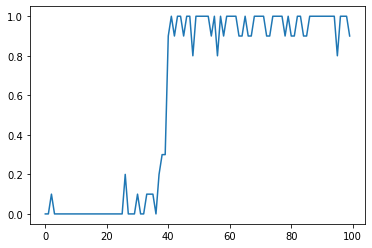

In [13]:
env = env_8x8
s = env.reset()
R, J, Q = q_learn(env, num_episodes=1000)

R = np.array(R)
resultR = R[:(R.size // width * width)].reshape(-1, width).mean(axis=1)
plt.plot(resultR, label=r"$1$")
print(np.average(R))
N = list(R).count(1)
M = list(R).count(0)
print(N)
print(M)

## 3.b. Model Priors, wereld kennis (10 punten)

In het grid van 8x8 zien we dat de robot velen trials nodig heeft om een simpele taak op te lossen. En dit is nog een erg simpele wereld met slechts 64 states! We gaan nu proberen of we de Q-learning robot een beetje kunnen helpen sneller te leren. Zoals we in het college gezien hebben (en zie [hier](https://arxiv.org/pdf/1802.10217.pdf)) zijn mensen heel snel in het leren van computer games omdat ze hun kennis over de wereld toepassen op de spelwereld. Laten we dat hier ook proberen en de robot wat meer kennis geven. 

Om te beginnen is het voor de robot nu niet heel duidelijk dat in een wak vallen een slecht idee is. De beloning die er bij hoort is nu nul. Het is voor mensen duidelijk dat in een wak vallen niet goed is voor het doel behalen. Zo kan je dus een kleine aanpassing maken.
Implementeer ook het volgende:

```python
 if d and r == 0:
     r = -1
```

doe dit direct na de `env.step()` stap waarbij dus net `r` is bepaald. Dit zal het model helpen sneller te leren om wakken te vermijden, door daar een negatieve reward aan te geven.  Zorg dat je deze toevoeging ook makkelijk weer aan of uit kunt zetten, zodat je het algoritme met en zonder deze toevoeging kunt testen.

Implementeer daarnaast ook nog de volgende twee toevoegingen in het `q_learn` model, die ook makkelijk aan of uit moeten kunnen voor de tests:

1.  Leer de robot dat als je in een wak loopt, je ook in dit wak loopt als je van een andere kant op het zelfde hokje loopt. Stel je loopt van boven in een wak, leer dan meteen dat je ook in datzelfde wak loopt als je er van links, rechts of van onder in loopt. Met andere woorden introduceer een minimale versie van een cognitive map!
    * *Hint: Houd hierbij rekening met de boundaries, update geen states die niet bestaan of niet in 1 stap bereikbaar zijn.*

2. Leer snel af om tegen muren aan te lopen. Tegen een muur aanlopen is nu nog geoorloofd. Wanneer dit gebeurt keert de robot simpelweg terug naar de plek waar hij vandaan kwam, wat resulteert in een reward van 0. Zorg dat de robot dit niet meer doet.
    * *Hint: Leer dit de robot niet af door hier ook een negatieve reward aan te geven, want dan worden de rewards onderling lastiger te vergelijken (gezien er dan meerdere negatieve rewards en 1 positieve reward in een episode kunnen zitten). In plaats daarvan zou je de Q-value van de action zelf kunnen aanpassen of aanpassen hoe de action selection precies werkt.*

Beide veranderingen kunnen op verschillende manieren worden geimplementeerd. Je kan naar de Q tables kijken om te zien of jouw implementatie gewerkt heeft. 

Run de verschillende implementaties van het model, met geen, een of een combinatie van meerdere elementen van kennis. Run elk model 20 keer voor 500 episodes en vergelijk de average rewards. Beschrijf hoe elk element wel of niet bijdraagt aan beter of sneller leren. 


In [14]:
def q_learn(env, alpha=.8, gamma=.95, epsilon=.1, num_episodes=2000, cog_map=True, block_wall=True):

    # Initialize Q table with all zeros
    states = env.observation_space.n
    actions = env.action_space.n
    Q = np.zeros([states,actions])

    # Create lists to contain total rewards and steps per episode
    jList = [] #step list
    rList = [] #reward list

    # Start learning:
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        # Total rewards this episode start at 0
        rAll = 0
        # You are still not done: (d is specific to frozen lake) 
        d = False
        # Run counter reset:
        j = 0
    
        # The Q-Table learning algorithm, each episode consists of several learning runs (loops)
        while j < 100:
            j+=1
        
            # Choose an action by greedily picking from Q table
            # NOTE (a)ctions in FrozenLake are 0:left,1:down,2:right,3:up  (this is hardcoded in env.)
            
            # implement the e-greedy rule
            # As in previous laptop colleges arbitrate between draws when there is more than one max Q
            
            if random.random() < epsilon:
                a = random.randint(0, actions-1)
            else:
                As = np.argwhere(Q[s,:] == np.amax(Q[s,:])).flatten()
                if len(As) > 1:
                    a = np.random.choice(As)
                else:
                    a = As[0]

            # Get new state and reward from environment, this can/must be done with env.step from the Gym
            # where s1 is the new state, r is the reward, and d means the end (hole or frisbee)
            s1,r,d,_ = env.step(a)
            update = [(s, a)]
            
            # First improvement
            if d and r == 0:
                r = -1
            
            # Second improvement
            if cog_map:
                env_P = env.P
                update = []
                for img_state in env_P:
                        for pos_move in env_P[img_state]:
                            if img_state != s1:
                                if env_P[img_state][pos_move][0][1] == s1:
                                    update.append((img_state, pos_move))
            
            # Update Q-Table with new knowledge (assume you pick a with highest value in that state)
            # Third improvement
            if block_wall:
                if s1 == s:
                    Q[s,a] = -1
            else:
                for state, action in update:
                    delta = r + gamma * max(Q[s1,:]) - Q[state, action]
                    Q[state,action] += alpha * delta
            
            
            # Update total rewards
            rAll += r
            
            # If frisbee or hole (d) then end run
            if d:
                break
            
            
            # Update state
            s = s1
        
   
        # Update e, reducing exploration over episodes
        epsilon = epsilon*.999
        jList.append(j)
        rList.append(rAll)
    
    return (rList, jList, Q) 

In [15]:
episodes, iters = 500, 20
options = [[True, True], [True, False], [False, False], [False, True]]
for cog, wall in options:
    total_R, total_J = 0, 0
    for _ in range(iters):
        R, J, Q = q_learn(env, num_episodes=episodes, cog_map=cog, block_wall=wall)
        total_R += np.mean(R)
        total_J += np.mean(J)
    print("Het gemiddelde van cog_map = {} and block_wall = {} is: reward = {:.3f} en #stappen = {:.3f}".format(cog, wall, np.mean(total_R), np.mean(total_J)))

Het gemiddelde van cog_map = True and block_wall = True is: reward = -19.916 en #stappen = 509.594
Het gemiddelde van cog_map = True and block_wall = False is: reward = -19.888 en #stappen = 1939.364
Het gemiddelde van cog_map = False and block_wall = False is: reward = 6.408 en #stappen = 614.642
Het gemiddelde van cog_map = False and block_wall = True is: reward = -19.900 en #stappen = 515.504


> Volgens de verkregen waardes geeft cog_map en block_wall allebei uit de hoogste rewards. En zijn de runs met block_wall aan met het minste aantal stappen. De run met beide variabelen uit heeft de meeste stappen maar dus ook de beste rewards. 

## 3.c. (10 punten)
Verzin zelf nog een ingreep die het model beter kan laten leren, denk dan vooral na over hoe mensen het spel zouden spelen (common sense). Laat zien hoe veel beter jou model werkt (de beste implementaties zullen we bespreken in het college). 

> Het idee is om de agent geen stappen terug te laten zetten als er een andere optie is

In [16]:
def q_learn(env, alpha=.8, gamma=.95, epsilon=.1, num_episodes=2000, cog_map=True, block_wall=True, step_back=True):

    # Initialize Q table with all zeros
    states = env.observation_space.n
    actions = env.action_space.n
    Q = np.zeros([states,actions])

    # Create lists to contain total rewards and steps per episode
    jList = [] #step list
    rList = [] #reward list

    # Start learning:
    for i in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        # Total rewards this episode start at 0
        rAll = 0
        # You are still not done: (d is specific to frozen lake) 
        d = False
        # Run counter reset:
        j = 0
        
        found_a = False
    
        # The Q-Table learning algorithm, each episode consists of several learning runs (loops)
        while j < 100:
            j+=1
        
            # Choose an action by greedily picking from Q table
            # NOTE (a)ctions in FrozenLake are 0:left,1:down,2:right,3:up  (this is hardcoded in env.)
            
            # implement the e-greedy rule
            # As in previous laptop colleges arbitrate between draws when there is more than one max Q
            
            if random.random() < epsilon:
                a = random.randint(0, actions-1)
            else:
                As = np.argwhere(Q[s,:] == np.amax(Q[s,:])).flatten()    
                if len(As) > 1:
                    
                    # Own addition
                    if step_back:
                        if found_a:
                            move_not = (a + 2) % 4
                            if move_not in As:
                                As = list(As)
                                As.remove(move_not)
                                As = np.array(As)
                                
                    a = np.random.choice(As)
                else:
                    a = As[0]

            # Get new state and reward from environment, this can/must be done with env.step from the Gym
            # where s1 is the new state, r is the reward, and d means the end (hole or frisbee)
            s1,r,d,_ = env.step(a)
            update = [(s, a)]
            
            # First improvement
            if d and r == 0:
                r = -1
            
            # Second improvement
            if cog_map:
                env_P = env.P
                update = []
                for img_state in env_P:
                        for pos_move in env_P[img_state]:
                            if img_state != s1:
                                if env_P[img_state][pos_move][0][1] == s1:
                                    update.append((img_state, pos_move))
            
            # Update Q-Table with new knowledge (assume you pick a with highest value in that state)
            # Third improvement
            if block_wall:
                if s1 == s:
                    Q[s,a] = -1
            else:
                for state, action in update:
                    delta = r + gamma * max(Q[s1,:]) - Q[state, action]
                    Q[state,action] += alpha * delta
            
            
            # Update total rewards
            rAll += r
            
            # If frisbee or hole (d) then end run
            if d:
                break
            
            
            # Update state
            s = s1
            
            found_a = a
        
   
        # Update e, reducing exploration over episodes
        epsilon = epsilon*.999
        jList.append(j)
        rList.append(rAll)
    
    return (rList, jList, Q) 

In [17]:
episodes, iters = 500, 20
options = [[True, True], [True, False], [False, False], [False, True]]
for cog, wall in options:
    total_R, total_J = 0, 0
    for _ in range(iters):
        R, J, Q = q_learn(env, num_episodes=episodes, cog_map=cog, block_wall=wall)
        total_R += np.mean(R)
        total_J += np.mean(J)
    print("Het gemiddelde van cog_map = {} and block_wall = {} is: reward = {:.3f} en #stappen = {:.3f}".format(cog, wall, np.mean(total_R), np.mean(total_J)))

Het gemiddelde van cog_map = True and block_wall = True is: reward = -19.516 en #stappen = 309.984
Het gemiddelde van cog_map = True and block_wall = False is: reward = 10.088 en #stappen = 493.200
Het gemiddelde van cog_map = False and block_wall = False is: reward = 14.040 en #stappen = 358.460
Het gemiddelde van cog_map = False and block_wall = True is: reward = -19.464 en #stappen = 307.522


> De implementatie werkt erg goed. De rewards voor block_wall False zijn allebei verbeterd. Voor cog_map is deze zelfs inplaats  van negatief erg positief geworden. Het aantal stappen is voor elke methode aanzienlijk verbeterd.

# Q Networks

We hebben nu nog gewerkt met een kleine wereld met maar maximaal 64 states. De echte wereld, en veel leuke spelletjes, hebben natuurlijk een veel grotere state space, en dan wordt het al snel erg lastig om nog een Q table bij te houden. In zulke gevallen kunnen Q netwerken heel handig zijn, en dan met name Deep Q Networks (DQN). Een deep neural network kan gebruikt worden om de state space een stuk beter generaliseerbaar te maken en om vergelijkbare Q-values toe te kennen aan stes die veel op elkaar lijken. Dit is een zeer waardevolle eigenschap gebleken (zie bijv. het oorspronkelijke DQN paper over Atari games leren spelen [hier](https://arxiv.org/pdf/1312.5602v1.pdf))

In deze opdracht gaan we geen deep Q netwerk in elkaar zetten, maar wel een simpel 1-layer Q netwerk. Hiermee leren jullie hoe zulke netwerken werken en hoe het Q learning algoritme kan worden geïmplementeerd in een netwerkn netwerk. We maken hier gebruik van [PyTorch](https://pytorch.org/get-started/locally/), een library waarmee je eenvoudig (deep) neural networks kan definiëren en trainen. Deze library is zeer geschikt voor DQN, en dus ook weer voor de Frozen Lake omgeving.

De opdracht is gemaakt in PyTorch 1.3.0, maar moet ook prima werken in versie 1.4.0. Zorg dus dat je een van deze twee hebt geinstalleerd, via bijvoorbeeld ```pip install torch torchvision```.

In [18]:
# This exercise was built in PyTorch 1.3.0

import torch
import torch.nn as nn

print(torch.__version__)

# some PyTorch tips

# tensor.unsqueeze(index) adds an extra dimension at index
# for example, if our current tensor t is of size (20, ), 
# t.unsqueeze(0)  --> t.shape = (1, 20)
# t.unsqueeze(1)  --> t.shape = (20, 1)
# t.unsqueeze(-1) --> t.shape = (20, 1)

# t.max() returns (max_value, value_loc), not just max_value

# t.item() can only be called if t is a tensor with a single value,
# t = [[[[[1]]]]], t = [1] will both return 1 with t.item()

# tensors are usually added to the computational graph by default
# t.detach() detaches the tensor from the graph, which makes sure 
# that we dont accidentally calculate the gradient of what should be a
# static value.

# t.gather(index, LongTensor(values)) is a way to do smart slicing in PyTorch.
# the only prerequisite is that t and values are of similar shape at the batch index.
# the batch index is usually the first. For example,
# q is of shape (1, 4), 4 values for a single state representing q-values for each action
# a is of shape (1, 1), a single action performed for that state.
# q.gather(1, a) essentially collects the Q value for action a

1.5.0


We gaan een simpel Q netwerk opzetten waarbij er voor elke state (16 in totaal) een node is in de input laag, en voor elke actie (4 in totaal) een node in de output laag. Het doel is om de gewichten (weights) van het netwerk zo te trainen dat gegeven een state als input, de 4 outputs corresponderen met de Q-values van de 4 verschillende acties voor die state. Vervolgens kunnen we gewoon een *argmax* gebruiken om de actie met de hoogste Q-value te selecteren. 

Er zijn 16 input nodes (```feature_size```), waarbij elke state nu gerepresenteerd kan worden met een [one-hot encoding](https://en.wikipedia.org/wiki/One-hot), dus door alleen de input node van die state op 1 te zetten en alle andere input nodes op 0. Het encoderen gebeurt in de class ```OneHotEncoder```, welke als input een state ```x``` neemt en een one-hot versie returned.

In [19]:
class OneHotEncoder:
    """
    Converts an integer label to a one-hot encoded (torch) tensor.
    Additionally supports a batch operation.
    """
    
    def __init__(self, feature_size):
        self.feature_size = feature_size
        
    def __call__(self, x):
        """
        x: a list type or scalar
        
        returns: torch.FloatTensor one-hot encoding of x.
        """
        if not isinstance(x, list):
            x = [x]
        
        batch_size = len(x)
        one_hot = torch.FloatTensor(batch_size, self.feature_size).zero_()
        
        # Only unsqueeze if its not a batch operation.
        x = torch.LongTensor(x)
        x = x.unsqueeze(-1) if x.ndim < 2 else x

        one_hot.scatter_(1, x, 1)
        return one_hot

In de cell hieronder vind je het Q-netwerk model. De `Linear() q_weights` laag is gedefineerd als de matrix vermenigvuldiging van inputs en weights, dus simpelweg de som van de inputs vermenigvuldigt met de weights voor elke output (deze manier om een neural network te definiëren zou je bekend moeten voorkomen uit **Leren**). Er is hier dus *geen* activatiefunctie (zoals bijv. Sigmoid of ReLU), i.e. dit is een netwerk met alleen een lineaire layer (en daarom is er ook geen bias of intercept aanwezig).

We gebruiken hier de Sum Squared Error tussen de berekende Q-values en de eigenlijke Q-values van een state als de loss functie om het netwerk te trainen. Dit is dus ook de functie die geminimaliseerd wordt tijdens het trainen. Je kan de functie ```td_error``` zien aan het einde van de class.

In [20]:
class LinearQNetwork(nn.Module):
    """
        This class implements a linear Q-learning agent. It has
        - a weight matrix q_weights of size (env_features, num_actions)
        - a Stochastic Gradient Descent optimizer
        - a forward function to calculate the Q value
        - an action function that calculates the greedy action to take
        - a td-error calculation, where we calculate TD-error for Q-learning
        
            r_{t+1} + gamma * max_a Q(s_{t+1}, a) - Q(s_t, a_t)
        
          And we will use the squared error to minimize this error.
        
        FYI:
        super() in the __init__ is being called for a few reason, most notably:
        - it automatically gives the model a .backward() function
          which calculates how the gradients flow through the network
        - LinearQNetwork(input) now forwards input to the 'forward' function.
          (model(input) and model.forward(input) is exactly the same.)
    """
    def __init__(self, in_features, num_actions, lr=0.05):
        super().__init__()
        
        self.q_weights = nn.Linear(in_features, num_actions, bias=False)
        self.q_weights.weight.data.uniform_(0.0, 0.1)
        
        self.optimizer = torch.optim.SGD(self.parameters(), lr=lr)
            
    def forward(self, s):
        """
        s: one-hot encoded state
        
        Calculate the Q value of the state
        """
        q = self.q_weights(s)
        return q
    
    def action(self, s):
        """
        s: one-hot encoded state
        
        Calculate the greedy action given state s
        """
        q = self.forward(s)
        action = q.argmax(-1).item()
        return q, action

    def td_error(self, state, action, reward, next_state, gamma, oh):
        """
         we calculate TD-error for Q-learning
        
            r_{t+1} + gamma * max_a Q(s_{t+1}, a) - Q(s_t, a_t)
        """        
        reward = torch.FloatTensor(reward).unsqueeze(-1)
        action = torch.LongTensor(action).unsqueeze(-1)

        # Calculate Q(s, ~) and Q(s_next, ~)
        q = self(oh(state))
        q_next = self(oh(next_state)).detach()
                
        # Get Q(s, a) and Q(s_next, a_max)
        q = q.gather(1, action)
        q_next_max = q_next.max(-1)[0].unsqueeze(-1)
        q_return = reward + gamma * q_next_max

        # Calculate the squared error and perform a SGD step.
        loss = (q_return - q).pow(2).sum()
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        
        # We optionally return the loss. Maybe you can plot it?
        return loss.item()

Nu wordt het tijd om het netwerk te gaan trainen. Hiervoor schrijven we de functie ` q_network `. We helpen je hier een heel stuk op weg. Loop stap voor stap de code door om te kijken of je elke stap begrijpt en vergelijk deze met de stappen van het standaard `q_learn()` algoritme dat je hierboven hebt gebruikt. 

In [21]:
def q_network(env, num_episodes=250, num_rounds=99, replay=0, batch_size=32):
    y = 0.97
    e = 0.3
    
    oh = OneHotEncoder(feature_size=env.observation_space.n)
    agent = LinearQNetwork(in_features=env.observation_space.n, num_actions=env.action_space.n)
    initial_w = agent.q_weights.weight.clone().detach().numpy()
    
    jList = []
    rList = []
    aList = [] # list of actions
    
    # for replay
    memory = []
    d_memory = []
    
    for _ in range(num_episodes):
        # Reset environment and get first new observation
        s = env.reset()
        rAll = 0
        d = False
        j = 0
        
        #The Q-Network, default run it for 99 rounds per episode
        while j < num_rounds:
            j += 1
            
            q, greedy_action = agent.action(oh(s))

            # Choose an action by greedily (with e chance of random action) from the Q-network
            random_action = env.action_space.sample()
            a = greedy_action if e < np.random.rand() else random_action
            aList.append(a)
            
            s1, r, d, _ = env.step(a)
            
            # falling in a hole will hurt 
            if d and r == 0:
                r = -1
                
            if d: # this is only for experience reply part
                d_memory.append((s, a, r, s1, d)) 
            
            memory.append((s, a, r, s1, d)) # this is only for experience reply part

            # Train our network, we try to adjust weights in order to 
            # minimize prediction error or squared error. We currently do not
            # use the loss, but you might want to visualize it.
            loss = agent.td_error(s, [a], [r], s1, y, oh)
            
            rAll += r
            s = s1
                
            if d:
                break
        
        # Reduce chance of a random action as we train the model.
        e *= 0.995
        jList.append(j)
        rList.append(rAll)
        
        # Experience replay 
        if replay > 0:
        #if (rAll/99) < 0 and replay > 0: # only replay succesfull episodes!
        
            # Select from which buffer to sample
            if replay == 1:
                sample_from = memory
            elif replay == 2:
                sample_from = d_memory
            elif replay == 3:
                if len(memory) > batch_size:
                    memory = memory[-batch_size:]
                sample_from = memory
            
            # only update after our buffer has at least 32
            # experiences
            if len(sample_from) < batch_size:
                continue
                
            # next, we sample 30 experience from the selected buffer
            [s, a, r, s1, d] = zip(*random.sample(sample_from, batch_size))
            
            # We then update our model using this experience
            agent.td_error(list(s), a, r, list(s1), y, oh)
        
    final_w = agent.q_weights.weight.detach().numpy()
    print("\nPercent of succesful episodes: " + str(sum(rList)/num_episodes) + "%")
    return rList, jList, aList, initial_w, final_w

![](QNET.png) 
Hier zie je een schema van hoe het netwerk eruitziet.

# 4.a (5 punten)

Run het model voor 1 episode, en 1 ronde. Zo kan je volgen wat er na een stap gebeurd is in het netwerk. Rapporteer de initial weights nog voor de eerste stap gezet wordt, geef ook aan welke actie het model gekozen heeft voor die stap en hoe de nieuwe weights na training eruitzien. Gegeven dat er nu voor maar 1 ronde geleerd wordt zullen de enige weights die worden aangepast de weights uit de starting state 0 zijn, dus vergelijk alleen weights die bij deze state horen.

Geef aan hoe dit in vergelijking is met de `q_learn()`. Verwijs in je uitleg ook naar prediction errors. 


In [22]:
env = env_4x4
s = env.reset()
R, J, A, Wi, Wf = q_network(env, num_episodes=1, num_rounds=1)

print("De startwaarde voor de weights zijn: {}".format(Wi[:,0]))
print("De geleerde weights na 1 trial zijn: {}".format(Wf[:,0]))
print("Er is dus de *{}*e stap gekozen, de vernieuwing is {}".format(A[0], Wf[:,0] - Wi[:,0]))

# In (Wf - Wi) kun je zien welke weight er in die stap veranderd is,
# en hoe. In deze implementatie worden de weights veranderd om de prediction err - r te minimaliseren,
# dit verschilt van de standaard q_learn functie waar de Q waarden steeds geupdatet worden ahv de
# prediction error die gegeven is voor het doen van een bepaalde stap. Dit betekent dat q_network
# bij elke genomen stap iets 'leert', maar q_learn leert alleen van het maken van een foute stap/het
# doel behalen.


Percent of succesful episodes: 0.0%
De startwaarde voor de weights zijn: [0.01977492 0.07100318 0.00873856 0.08240545]
De geleerde weights na 1 trial zijn: [0.01977492 0.07100318 0.00873856 0.08215823]
Er is dus de *3*e stap gekozen, de vernieuwing is [ 0.          0.          0.         -0.00024722]


# 4.b (5 punten)

Run nu nogmaals het netwerk maar nu met 500 episodes en 99 rounds per episode. Laat net als bij `q_learn` nu zien hoe goed het netwerk is over tijd (rewards & number of steps). Maar laat nu ook zien wat de weights/Q-values zijn voor de vier mogelijke acties in het hokje links naast de frisbee (state 14). Heeft de beste actie ook de hoogste waarde?

Gegeven dat states in dit model gepresenteerd worden met een one-hot encoding, en dat het model alleen uit 1 lineaire laag bestaat, worden de Q-values in dit simpele model nog op een vrij directe manier geleerd. Wat is hier dus de relatie tussen de weight matrix en Q-table?



Percent of succesful episodes: 0.724%
6
0.724
[0.33121178 0.7256564  1.0759104  0.5547542 ]


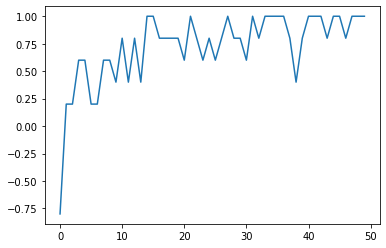

In [23]:
env = env_4x4
s = env.reset()
R, J, A, Wi, Wf = q_network(env, num_episodes=500, num_rounds=99)

route = [J[i] for i, r in enumerate(R) if r == 1]
print(min(route))

print(np.average(R))
R = np.array(R)
resultR = R[:(R.size // width * width)].reshape(-1, width).mean(axis=1)
plt.plot(resultR, label=r"$1$")

print(Wf[:,14])

# De kortste route is 6 stappen, en de gemiddelde reward is ~0.6. De 'beste' actie
# (naar rechts gaan) heeft inderdaad de hoogste waarde, naar rechts gaan is nodig om
# het doel te bereiken aangezien de robot links begint. Omdat er maar 1 laag bestaat
# in dit model is de weight matrix ongeveer hetzelfde als de Q-table, ze geven allebei
# met één parameter weer welke stappen gunstig zijn en welke minder.

# Bonus vraag

# 4.c Experience Replay (10 punten)

Q_networks zijn op vele manier uitgebreid om nog beter te kunnen leren. Een ding wat we al genoemd hebben is bijvoorbeeld het toevoegen van meerdere lagen. Een ander idee is experience replay, gebaseerd op hoe onze hersenen werken. De gedachte achter experience relay is dat de robot tussen leer episodes door in zijn geheugen graaft en kijkt wat hij hiervoor gedaan heeft en wat de uitkomst daar van was. Deze herinneringen worden dan weer gebruikt om van te leren (alsof elke herinnering weer een echte gebeurtenis was). Experience replay wordt veel gebruikt in reinforcement learning, de DQN Atari paper gelinked in de section *Q networks* maakt hier bijvoorbeeld ook gebruik van.

Wat we hier gaan doen is experience replay toevoegen aan het Q_netwerk. Je hebt hier eigenlijk maar een ding voor nodig; een memory buffer (`memory =[]`)

In deze buffer sla je voor elke episode van elke run op wat er gebeurde. De staat waar in je was, welke actie je hebt ondernomen, of je een beloning kreeg, welke staat je terecht kwam en of dit het einde van de episode was):   `memory.append((s, a[0], r, s1, d))`

Aan het eind van elke episode haal je dan 30 keer een willekeurige herninnering boven en speelt deze weer uit alsof het echt gebeurde (dus zorgt voor een zelfde update in weights als normaal leren). Bij het begin van een nieuwe leer episode wordt de buffer weer leeggemaakt om ruimte te maken voor nieuwe evaringen. 

Implementeer deze experience replay. Vergelijk de prestatie van het model met en zonder replay, door beide modellen op z'n minst 10 keer aan te roepen en te kijken naar de verschillen in gemiddelde beloning. 

> Telde niet meer mee

# 4.d Better memories (5 punten)
We hebben nu naar replay gekeken waarbij je naar willekeurige herinneringen gaat kijken. Voor DQNs leidt dit al tot zeer goede resultaten, maar het kan beter. Er zijn verschillende algoritmes bedacht waarbij niet naar willekeurige maar juist naar specifieke herinneringen wordt gekeken om het leren nog verder te optimaliseren. Bedenk en implementeer een vorm van optimalisatie van de replay functie, en test deze ook. Schrijf in je antwoord je motivatie voor je aanpassing (die is belangrijker dan het slagen er van). Moge de beste aanpassing winnen! 

> Telde niet meer mee

# Next step: Deep Q Networks! 
Open hiervoor 0_intro deep Q learning in de folder `ColabNotebooks`. Daar zijn ook nog punten mee te behalen, maar vooral heel veel te leren. Als je die af hebt ben je helemaal bij met de laatste ontwikkelingen in Machine Learning; Deep Q Nets! 